This notebook is for Data Wrangling and Cleaning

In [413]:
# Imports
import pandas as pd
pd.options.mode.chained_assignment=None 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

This is the main dataset that contains information for each Food Environment Atlas category.

In [362]:
# Importing Dataset
file_food_atlas = 'StateAndCountyData.csv'
data_state_county = pd.read_csv(file_food_atlas)
data_state_county.head()

,FIPS,State,County,Variable_Code,Value
0,1001,AL,Autauga,LACCESS_POP10,18428.439690
1,1001,AL,Autauga,LACCESS_POP15,17496.693040
2,1001,AL,Autauga,PCH_LACCESS_POP_10_15,-5.056026
3,1001,AL,Autauga,PCT_LACCESS_POP10,33.769657
4,1001,AL,Autauga,PCT_LACCESS_POP15,32.062255


In [363]:
data_state_county.dtypes

FIPS               int64
State             object
County            object
Variable_Code     object
Value            float64
dtype: object

In [364]:
data_state_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852810 entries, 0 to 852809
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   FIPS           852810 non-null  int64  
 1   State          852810 non-null  object 
 2   County         852810 non-null  object 
 3   Variable_Code  852810 non-null  object 
 4   Value          852810 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 32.5+ MB


In [365]:
data_state_county.describe()

,FIPS,Value
count,852810.000000,8.528100e+05
mean,30336.233835,1.053919e+04
std,15188.596259,2.148199e+05
min,1.000000,-1.000000e+02
25%,18171.000000,0.000000e+00
50%,29171.000000,3.000000e+00
75%,45069.000000,2.910000e+01
max,56045.000000,3.955704e+07


In [366]:
data_state_county.columns

Index(['FIPS', 'State', 'County', 'Variable_Code', 'Value'], dtype='object')

Importing State Dataset -- This dataset contains supplemental information at the state level

In [367]:
# Importing State Dataset
file_state_data = 'SupplementalDataState.csv'
data_state = pd.read_csv(file_state_data)
data_state.head()

,State_FIPS,State,Variable_Code,Value
0,1,AL,WIC_PART_2012,141899.8333
1,1,AL,WIC_PART_2013,139000.5000
2,1,AL,WIC_PART_2014,131046.2500
3,1,AL,WIC_PART_2015,132132.7500
4,1,AL,WIC_PART_2016,129159.9167


Importing County Dataset -- This dataset contains supplemental information

In [368]:
# Importing County Dataset
file_county_data = 'SupplementalDataCounty.csv'
data_county = pd.read_csv(file_county_data)
data_county.head()

,FIPS,State,County,Variable_Code,Value
0,1001,AL,Autauga County,2010_Census_Population,54571
1,1001,AL,Autauga County,Population_Estimate_2011,55208
2,1001,AL,Autauga County,Population_Estimate_2012,54936
3,1001,AL,Autauga County,Population_Estimate_2013,54713
4,1001,AL,Autauga County,Population_Estimate_2014,54876


In [369]:
data_county.dtypes

FIPS              int64
State            object
County           object
Variable_Code    object
Value             int64
dtype: object

Importing Variable List -- Might be useful later

In [370]:
file_variables = 'VariableList.csv'
variable_list = pd.read_csv(file_variables)
variable_list.head()

,Variable_Name,Category_Name,Category_Code,Subcategory_Name,Variable_Code,Geography,Units
0,"Population, low access to store, 2010",Access and Proximity to Grocery Store,ACCESS,Overall,LACCESS_POP10,CNTY10,Count
1,"Population, low access to store, 2015",Access and Proximity to Grocery Store,ACCESS,Overall,LACCESS_POP15,CNTY10,Count
2,"Population, low access to store (% change), 20...",Access and Proximity to Grocery Store,ACCESS,Overall,PCH_LACCESS_POP_10_15,CNTY10,% change
3,"Population, low access to store (%), 2010",Access and Proximity to Grocery Store,ACCESS,Overall,PCT_LACCESS_POP10,CNTY10,Percent
4,"Population, low access to store (%), 2015",Access and Proximity to Grocery Store,ACCESS,Overall,PCT_LACCESS_POP15,CNTY10,Percent


In [371]:
variable_list.dtypes

Variable_Name       object
Category_Name       object
Category_Code       object
Subcategory_Name    object
Variable_Code       object
Geography           object
Units               object
dtype: object

Filtering the data by the years 2010 and 2015

In [372]:
filtered_df = data_state_county[data_state_county['Variable_Code'].str.contains('(10|15)$')]

/tmp/ipykernel_95157/3209300512.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_df = data_state_county[data_state_county['Variable_Code'].str.contains('(10|15)$')]


In [373]:
filtered_df.head()

,FIPS,State,County,Variable_Code,Value
0,1001,AL,Autauga,LACCESS_POP10,18428.439690
1,1001,AL,Autauga,LACCESS_POP15,17496.693040
2,1001,AL,Autauga,PCH_LACCESS_POP_10_15,-5.056026
3,1001,AL,Autauga,PCT_LACCESS_POP10,33.769657
4,1001,AL,Autauga,PCT_LACCESS_POP15,32.062255


Clearing the County and State columns to prevent duplicate values

In [374]:
filtered_df['County'] = filtered_df['County'].str.replace(r'[^\w\s]', '', regex=True) # Remove punctuation
filtered_df['County'] = filtered_df['County'].str.replace('County', '') # Remove 'County' word, only present sometimes
filtered_df['County'] = filtered_df['County'].str.strip() # Remove leading and trailing spaces
filtered_df['County'] = filtered_df['County'].str.lower() # Convert to lowercase

In [375]:
filtered_df.head()

,FIPS,State,County,Variable_Code,Value
0,1001,AL,autauga,LACCESS_POP10,18428.439690
1,1001,AL,autauga,LACCESS_POP15,17496.693040
2,1001,AL,autauga,PCH_LACCESS_POP_10_15,-5.056026
3,1001,AL,autauga,PCT_LACCESS_POP10,33.769657
4,1001,AL,autauga,PCT_LACCESS_POP15,32.062255


In [376]:
filtered_df['State'] = filtered_df.loc[:, 'State'].str.replace(r'[^\w\s]', '', regex=True) # Remove punctuation
filtered_df['State'] = filtered_df['State'].str.strip() # Remove leading and trailing spaces
filtered_df['State'] = filtered_df['State'].str.upper() # Convert to uppercase

In [377]:
pivot_df = filtered_df.pivot_table(index=['FIPS', 'State', 'County'], columns='Variable_Code', values='Value').reset_index()

Isolating state totals in a separate dataframe.

In [378]:
state_totals = pivot_df[pivot_df['County']=='total']

In [379]:
state_totals = state_totals.dropna(axis=1, how='all')

In [380]:
state_totals.head()

Variable_Code,FIPS,State,County,CACFP_PART_2015,NSLP_PART_2015,SBP_PART_2015,SFSP_PART_2015,State_Population_2015,WIC_PART_2015
0,1,AL,total,51263.75,5.313053e+05,2.542703e+05,49715.0,4853160.0,1.321328e+05
1,2,AK,total,10786.50,5.361692e+04,2.511123e+04,5850.0,737547.0,1.968200e+04
2,4,AZ,total,42551.50,6.474257e+05,3.087424e+05,14763.0,6833596.0,1.670722e+05
3,5,AR,total,67984.50,3.209214e+05,1.801209e+05,31081.0,2978407.0,8.421958e+04
4,6,CA,total,562667.00,3.271744e+06,1.691159e+06,128025.0,38953142.0,1.265005e+06


In [381]:
state_totals.columns

Index(['FIPS', 'State', 'County', 'CACFP_PART_2015', 'NSLP_PART_2015',
       'SBP_PART_2015', 'SFSP_PART_2015', 'State_Population_2015',
       'WIC_PART_2015'],
      dtype='object', name='Variable_Code')

Exploring pivot df

In [382]:
pivot_df[pivot_df['State']=='AL']

Variable_Code,FIPS,State,County,CACFP_PART_2015,CHILDPOVRATE15,FARM_TO_SCHOOL15,FDPIR15,LACCESS_BLACK15,LACCESS_CHILD10,LACCESS_CHILD15,...,PCT_REDUCED_LUNCH15,PERCHLDPOV10,PERPOV10,POPLOSS10,POVRATE15,Population_Estimate_2015,SBP_PART_2015,SFSP_PART_2015,State_Population_2015,WIC_PART_2015
0,1,AL,total,51263.75,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,254270.2865,49715.0,4853160.0,132132.75
51,1001,AL,autauga,NaN,18.8,0.0,0.0,4216.473194,4822.500269,4616.971480,...,NaN,0.0,0.0,0.0,12.7,54838.0,NaN,NaN,NaN,NaN
52,1003,AL,baldwin,NaN,19.6,1.0,0.0,3540.965826,7916.131932,7007.972675,...,6.346384,0.0,0.0,0.0,12.9,202995.0,NaN,NaN,NaN,NaN
53,1005,AL,barbour,NaN,45.2,0.0,0.0,2713.124930,940.419327,1031.927776,...,2.317528,1.0,1.0,0.0,32.0,26294.0,NaN,NaN,NaN,NaN
54,1007,AL,bibb,NaN,29.3,0.0,0.0,419.099942,249.204753,232.642670,...,9.060807,1.0,0.0,0.0,22.2,22562.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,1125,AL,tuscaloosa,NaN,25.1,0.0,0.0,11864.193120,8714.449484,7647.398520,...,3.639208,0.0,0.0,0.0,20.0,204736.0,NaN,NaN,NaN,NaN
114,1127,AL,walker,NaN,31.1,0.0,0.0,1276.015464,1670.507570,1775.324000,...,5.514045,0.0,0.0,0.0,20.6,64933.0,NaN,NaN,NaN,NaN
115,1129,AL,washington,NaN,31.5,NaN,0.0,366.761017,454.162367,398.207005,...,8.991826,1.0,0.0,0.0,22.4,16828.0,NaN,NaN,NaN,NaN
116,1131,AL,wilcox,NaN,49.2,0.0,0.0,4011.082404,1375.016342,1336.624194,...,0.000000,1.0,1.0,1.0,33.2,10903.0,NaN,NaN,NaN,NaN


Exploring the pivot table

In [383]:
pivot_df.dtypes

Variable_Code
FIPS                          int64
State                        object
County                       object
CACFP_PART_2015             float64
CHILDPOVRATE15              float64
                             ...   
Population_Estimate_2015    float64
SBP_PART_2015               float64
SFSP_PART_2015              float64
State_Population_2015       float64
WIC_PART_2015               float64
Length: 72, dtype: object

In [384]:
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 72 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   FIPS                       3328 non-null   int64  
 1   State                      3328 non-null   object 
 2   County                     3328 non-null   object 
 3   CACFP_PART_2015            51 non-null     float64
 4   CHILDPOVRATE15             3139 non-null   float64
 5   FARM_TO_SCHOOL15           2925 non-null   float64
 6   FDPIR15                    3143 non-null   float64
 7   LACCESS_BLACK15            3124 non-null   float64
 8   LACCESS_CHILD10            3143 non-null   float64
 9   LACCESS_CHILD15            3124 non-null   float64
 10  LACCESS_CHILD_10_15        3115 non-null   float64
 11  LACCESS_HHNV10             3143 non-null   float64
 12  LACCESS_HHNV15             3140 non-null   float64
 13  LACCESS_HISP15             3124 non-null   float

FIPS, State, and County all have the most non-null values (6334 each).

In [385]:
pivot_df.describe()

Variable_Code,FIPS,CACFP_PART_2015,CHILDPOVRATE15,FARM_TO_SCHOOL15,FDPIR15,LACCESS_BLACK15,LACCESS_CHILD10,LACCESS_CHILD15,LACCESS_CHILD_10_15,LACCESS_HHNV10,...,PCT_REDUCED_LUNCH15,PERCHLDPOV10,PERPOV10,POPLOSS10,POVRATE15,Population_Estimate_2015,SBP_PART_2015,SFSP_PART_2015,State_Population_2015,WIC_PART_2015
count,3328.000000,51.000000,3139.000000,2925.000000,3143.000000,3124.000000,3143.000000,3124.000000,3115.000000,3143.000000,...,2854.000000,3143.000000,3143.000000,3141.000000,3139.000000,3.142000e+03,5.100000e+01,51.000000,5.100000e+01,5.100000e+01
mean,29764.681490,81465.823529,23.238738,0.616410,0.159402,2269.428677,4959.224239,4742.980900,277.377250,660.785705,...,7.288870,0.225262,0.112313,0.168418,16.260975,1.020823e+05,2.728003e+05,49691.372549,6.289072e+06,1.536727e+05
std,15635.421817,108545.059263,9.364172,0.486343,0.977978,8793.761183,13169.301375,12216.611681,11060.345777,1121.141847,...,3.713097,0.417822,0.315801,0.374296,6.442319,3.281943e+05,3.570125e+05,66465.618598,7.177506e+06,2.180488e+05
min,1.000000,5581.000000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,-100.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.400000,8.800000e+01,1.468345e+04,3997.000000,5.856680e+05,1.099542e+04
25%,18110.500000,18939.375000,16.250000,0.000000,0.000000,7.000000,365.133646,354.654348,-11.021858,118.101203,...,5.091226,0.000000,0.000000,0.000000,11.500000,1.094800e+04,7.343671e+04,12752.000000,1.746760e+06,3.905363e+04
50%,29072.000000,49897.500000,22.300000,1.000000,0.000000,86.612488,937.758224,956.123349,-0.048853,320.065422,...,7.302426,0.000000,0.000000,0.000000,15.200000,2.563250e+04,1.850943e+05,33013.000000,4.425999e+06,1.055036e+05
75%,45067.500000,88461.125000,29.100000,1.000000,0.000000,1007.743295,3008.123733,3020.174780,7.263646,706.480605,...,9.393252,0.000000,0.000000,0.000000,19.700000,6.748825e+04,2.937282e+05,61503.500000,6.998570e+06,1.580745e+05
max,56045.000000,562667.000000,61.600000,1.000000,20.000000,167913.190400,260308.794100,219002.492900,592130.563800,16334.423180,...,35.714286,1.000000,1.000000,1.000000,47.400000,1.009704e+07,1.902636e+06,438926.000000,3.895314e+07,1.265005e+06


In [386]:
pivot_df.columns

Index(['FIPS', 'State', 'County', 'CACFP_PART_2015', 'CHILDPOVRATE15',
       'FARM_TO_SCHOOL15', 'FDPIR15', 'LACCESS_BLACK15', 'LACCESS_CHILD10',
       'LACCESS_CHILD15', 'LACCESS_CHILD_10_15', 'LACCESS_HHNV10',
       'LACCESS_HHNV15', 'LACCESS_HISP15', 'LACCESS_LOWI10', 'LACCESS_LOWI15',
       'LACCESS_MULTIR15', 'LACCESS_NHASIAN15', 'LACCESS_NHNA15',
       'LACCESS_NHPI15', 'LACCESS_POP10', 'LACCESS_POP15', 'LACCESS_SENIORS10',
       'LACCESS_SENIORS15', 'LACCESS_SNAP15', 'LACCESS_WHITE15', 'MEDHHINC15',
       'NSLP_PART_2015', 'PCH_FDPIR_12_15', 'PCH_LACCESS_HHNV_10_15',
       'PCH_LACCESS_LOWI_10_15', 'PCH_LACCESS_POP_10_15',
       'PCH_LACCESS_SENIORS_10_15', 'PCT_18YOUNGER10', 'PCT_65OLDER10',
       'PCT_FREE_LUNCH10', 'PCT_FREE_LUNCH15', 'PCT_HISP10',
       'PCT_LACCESS_BLACK15', 'PCT_LACCESS_CHILD10', 'PCT_LACCESS_CHILD15',
       'PCT_LACCESS_HHNV10', 'PCT_LACCESS_HHNV15', 'PCT_LACCESS_HISP15',
       'PCT_LACCESS_LOWI10', 'PCT_LACCESS_LOWI15', 'PCT_LACCESS_MULTIR15

Finding missing values

In [387]:
pivot_df.isna()

Variable_Code,FIPS,State,County,CACFP_PART_2015,CHILDPOVRATE15,FARM_TO_SCHOOL15,FDPIR15,LACCESS_BLACK15,LACCESS_CHILD10,LACCESS_CHILD15,...,PCT_REDUCED_LUNCH15,PERCHLDPOV10,PERPOV10,POPLOSS10,POVRATE15,Population_Estimate_2015,SBP_PART_2015,SFSP_PART_2015,State_Population_2015,WIC_PART_2015
0,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,False,False
1,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,False,False
2,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,False,False
3,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,False,False
4,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3323,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
3324,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
3325,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
3326,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True


In [388]:
missing_pop15 = pivot_df[pivot_df['Population_Estimate_2015'].isna()]

In [389]:
complete_pop15 = pivot_df[~pivot_df['Population_Estimate_2015'].isna()]

In [390]:
complete_pop15.describe()

Variable_Code,FIPS,CACFP_PART_2015,CHILDPOVRATE15,FARM_TO_SCHOOL15,FDPIR15,LACCESS_BLACK15,LACCESS_CHILD10,LACCESS_CHILD15,LACCESS_CHILD_10_15,LACCESS_HHNV10,...,PCT_REDUCED_LUNCH15,PERCHLDPOV10,PERPOV10,POPLOSS10,POVRATE15,Population_Estimate_2015,SBP_PART_2015,SFSP_PART_2015,State_Population_2015,WIC_PART_2015
count,3142.000000,0.0,3007.000000,2811.000000,3008.000000,2991.000000,3008.000000,2991.000000,2984.000000,3008.000000,...,2728.000000,3008.000000,3008.000000,3008.000000,3007.000000,3.142000e+03,0.0,0.0,0.0,0.0
mean,30383.649268,NaN,23.100931,0.620420,0.158245,2185.781425,5026.605428,4803.527469,287.490781,660.368223,...,7.419842,0.218085,0.107048,0.170545,16.146891,1.020823e+05,NaN,NaN,NaN,NaN
std,15162.508374,NaN,9.290579,0.485369,0.984529,8795.888453,13409.291442,12438.100224,11300.162612,1130.967068,...,3.693337,0.413014,0.309226,0.376174,6.385492,3.281943e+05,NaN,NaN,NaN,NaN
min,1001.000000,NaN,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,-100.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.400000,8.800000e+01,NaN,NaN,NaN,NaN
25%,18177.500000,NaN,16.200000,0.000000,0.000000,6.688703,364.415468,353.037120,-11.102732,118.110707,...,5.211623,0.000000,0.000000,0.000000,11.500000,1.094800e+04,NaN,NaN,NaN,NaN
50%,29176.000000,NaN,22.100000,1.000000,0.000000,77.426097,926.074984,945.627194,-0.055063,317.163467,...,7.423936,0.000000,0.000000,0.000000,15.100000,2.563250e+04,NaN,NaN,NaN,NaN
75%,45080.500000,NaN,28.900000,1.000000,0.000000,931.154326,2991.018464,2980.777311,7.028525,702.355623,...,9.499947,0.000000,0.000000,0.000000,19.500000,6.748825e+04,NaN,NaN,NaN,NaN
max,56045.000000,NaN,61.600000,1.000000,20.000000,167913.190400,260308.794100,219002.492900,592130.563800,16334.423180,...,35.714286,1.000000,1.000000,1.000000,47.400000,1.009704e+07,NaN,NaN,NaN,NaN


In [391]:
complete_pop15.head()

Variable_Code,FIPS,State,County,CACFP_PART_2015,CHILDPOVRATE15,FARM_TO_SCHOOL15,FDPIR15,LACCESS_BLACK15,LACCESS_CHILD10,LACCESS_CHILD15,...,PCT_REDUCED_LUNCH15,PERCHLDPOV10,PERPOV10,POPLOSS10,POVRATE15,Population_Estimate_2015,SBP_PART_2015,SFSP_PART_2015,State_Population_2015,WIC_PART_2015
51,1001,AL,autauga,NaN,18.8,0.0,0.0,4216.473194,4822.500269,4616.971480,...,NaN,0.0,0.0,0.0,12.7,54838.0,NaN,NaN,NaN,NaN
52,1003,AL,baldwin,NaN,19.6,1.0,0.0,3540.965826,7916.131932,7007.972675,...,6.346384,0.0,0.0,0.0,12.9,202995.0,NaN,NaN,NaN,NaN
53,1005,AL,barbour,NaN,45.2,0.0,0.0,2713.124930,940.419327,1031.927776,...,2.317528,1.0,1.0,0.0,32.0,26294.0,NaN,NaN,NaN,NaN
54,1007,AL,bibb,NaN,29.3,0.0,0.0,419.099942,249.204753,232.642670,...,9.060807,1.0,0.0,0.0,22.2,22562.0,NaN,NaN,NaN,NaN
55,1009,AL,blount,NaN,22.2,0.0,0.0,95.842687,384.911607,910.686113,...,7.895581,0.0,0.0,0.0,14.7,57522.0,NaN,NaN,NaN,NaN


In [392]:
populations = complete_pop15.groupby("State")["Population_Estimate_2015"].mean()

<Axes: xlabel='State'>

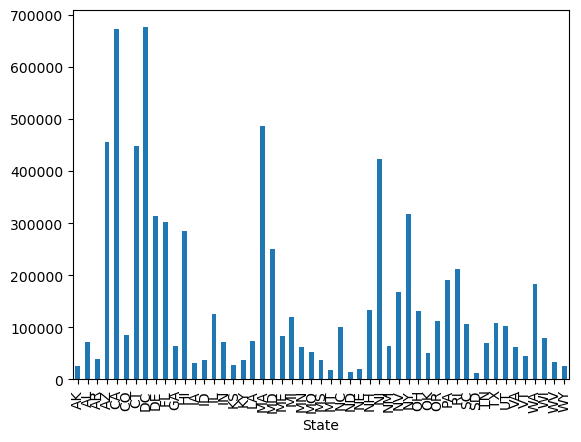

In [393]:
populations.plot(kind="bar")

In [394]:
missing_sum = pivot_df.isnull().sum()
missing_percent = 100 * pivot_df.isnull().mean()
missing = pd.concat([missing_sum, missing_percent], axis=1)
missing = missing.sort_values([0, 1], ascending=False)

In [395]:
missing = missing.rename(columns = {1:'Percent'})
missing = missing.rename(columns = {0:'Sum'})

In [396]:
missing[missing.Percent > 50]

,Sum,Percent
Variable_Code,,
CACFP_PART_2015,3277,98.467548
NSLP_PART_2015,3277,98.467548
SBP_PART_2015,3277,98.467548
SFSP_PART_2015,3277,98.467548
State_Population_2015,3277,98.467548
WIC_PART_2015,3277,98.467548


In [397]:
pivot_df = pivot_df.drop(['CACFP_PART_2015', 'NSLP_PART_2015', 'SBP_PART_2015', 'SFSP_PART_2015', 'State_Population_2015', 'WIC_PART_2015'], axis=1)

In [398]:
pivot_df

Variable_Code,FIPS,State,County,CHILDPOVRATE15,FARM_TO_SCHOOL15,FDPIR15,LACCESS_BLACK15,LACCESS_CHILD10,LACCESS_CHILD15,LACCESS_CHILD_10_15,...,PCT_NHNA10,PCT_NHPI10,PCT_NHWHITE10,PCT_REDUCED_LUNCH10,PCT_REDUCED_LUNCH15,PERCHLDPOV10,PERPOV10,POPLOSS10,POVRATE15,Population_Estimate_2015
0,1,AL,total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,AK,total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,AZ,total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,AR,total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,CA,total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3323,56037,WY,sweetwater,10.2,0.0,0.0,186.278452,3583.869531,4852.757500,35.405529,...,0.723645,0.093594,80.883897,7.989228,6.053441,0.0,0.0,0.0,8.5,44754.0
3324,56039,WY,teton,7.6,0.0,0.0,9.089826,1096.195276,1096.186959,-0.000759,...,0.356908,0.061050,82.206255,3.786645,8.916968,0.0,0.0,0.0,6.6,23016.0
3325,56041,WY,uinta,11.9,0.0,0.0,14.989817,1336.553029,1439.223015,7.681699,...,0.582442,0.161000,88.531111,12.148047,10.928456,0.0,0.0,0.0,9.8,20770.0
3326,56043,WY,washakie,15.7,0.0,0.0,2.000000,184.506884,184.506884,0.000000,...,0.597680,0.011719,83.886089,16.246684,14.617486,0.0,0.0,0.0,11.2,8280.0


In [399]:
pivot_df.isna().sum().sort_values(ascending=False)

Variable_Code
PCT_FREE_LUNCH15       474
PCT_REDUCED_LUNCH15    474
FARM_TO_SCHOOL15       403
PCT_REDUCED_LUNCH10    216
LACCESS_CHILD_10_15    213
                      ... 
PCT_HISP10             185
PCT_LACCESS_CHILD10    185
State                    0
County                   0
FIPS                     0
Length: 66, dtype: int64

In [400]:
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 66 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   FIPS                       3328 non-null   int64  
 1   State                      3328 non-null   object 
 2   County                     3328 non-null   object 
 3   CHILDPOVRATE15             3139 non-null   float64
 4   FARM_TO_SCHOOL15           2925 non-null   float64
 5   FDPIR15                    3143 non-null   float64
 6   LACCESS_BLACK15            3124 non-null   float64
 7   LACCESS_CHILD10            3143 non-null   float64
 8   LACCESS_CHILD15            3124 non-null   float64
 9   LACCESS_CHILD_10_15        3115 non-null   float64
 10  LACCESS_HHNV10             3143 non-null   float64
 11  LACCESS_HHNV15             3140 non-null   float64
 12  LACCESS_HISP15             3124 non-null   float64
 13  LACCESS_LOWI10             3143 non-null   float

In [401]:
pivot_df = pivot_df.drop('PCH_FDPIR_12_15', axis=1) # Drop col. It contains data outside 2010 and 2015

In [402]:
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 65 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   FIPS                       3328 non-null   int64  
 1   State                      3328 non-null   object 
 2   County                     3328 non-null   object 
 3   CHILDPOVRATE15             3139 non-null   float64
 4   FARM_TO_SCHOOL15           2925 non-null   float64
 5   FDPIR15                    3143 non-null   float64
 6   LACCESS_BLACK15            3124 non-null   float64
 7   LACCESS_CHILD10            3143 non-null   float64
 8   LACCESS_CHILD15            3124 non-null   float64
 9   LACCESS_CHILD_10_15        3115 non-null   float64
 10  LACCESS_HHNV10             3143 non-null   float64
 11  LACCESS_HHNV15             3140 non-null   float64
 12  LACCESS_HISP15             3124 non-null   float64
 13  LACCESS_LOWI10             3143 non-null   float

In [403]:
pivot_df[['County', 'State', 'Population_Estimate_2015']]

Variable_Code,County,State,Population_Estimate_2015
0,total,AL,NaN
1,total,AK,NaN
2,total,AZ,NaN
3,total,AR,NaN
4,total,CA,NaN
...,...,...,...
3323,sweetwater,WY,44754.0
3324,teton,WY,23016.0
3325,uinta,WY,20770.0
3326,washakie,WY,8280.0


In [408]:
# To deal with missing values, I will try to drop rows that contain "totals" from the County column
i = pivot_df[pivot_df.County == "total"].index

In [410]:
pivot_df = pivot_df.drop(i)

In [412]:
pivot_df.isna().sum().sort_values(ascending=False)

Variable_Code
PCT_FREE_LUNCH15       423
PCT_REDUCED_LUNCH15    423
FARM_TO_SCHOOL15       352
PCT_REDUCED_LUNCH10    165
LACCESS_CHILD_10_15    162
                      ... 
PCT_HISP10             134
PCT_LACCESS_CHILD10    134
State                    0
County                   0
FIPS                     0
Length: 65, dtype: int64

In [420]:
counts = (pivot_df[pivot_df.County != pivot_df.State]
 .groupby('State')['County']
 .value_counts())

In [422]:
counts['MO']

County
st louis       2
ozark          1
mississippi    1
moniteau       1
monroe         1
              ..
bates          1
benton         1
bollinger      1
boone          1
buchanan       1
Name: count, Length: 115, dtype: int64

<Axes: xlabel='State', ylabel='PCT_FREE_LUNCH15'>

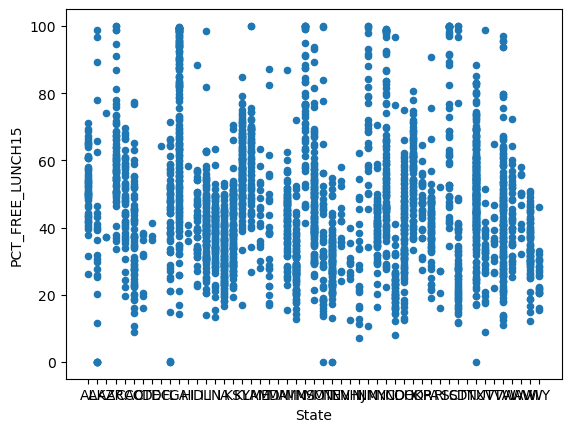

In [428]:
pivot_df.plot(x="State", y="PCT_FREE_LUNCH15", kind="scatter")